In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

Phi: -56.344347 +/- 0.385435
Theta: 40.649791 or +/- 0.267133
Phi(naive): -57.640000
Theta(naive): 42.596608


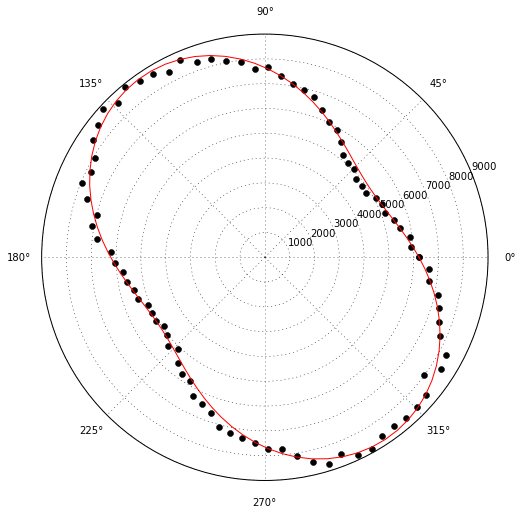

In [2]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 0.5mW scan 6 x71 y82 rotor sweep 1')
T1[:,1] -= 1459
OrientPol(T1,False)

[  1.31351013e+01   7.54305358e-03   2.47174937e+00   4.88966320e+02
   1.01058415e+02]
(1.6302274597048048, 10.0)


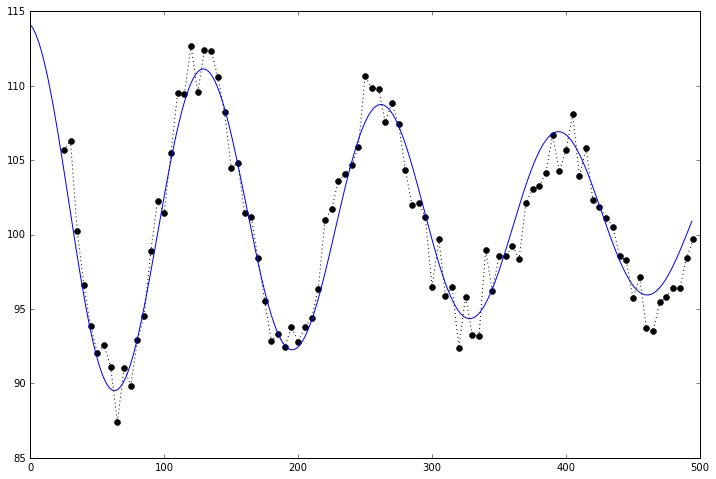

In [6]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B0.3V rabi *[2-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B0.3V rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

[  3460.57700263    926.07546666  23033.198962  ]
(23366.520408163266, 0.0065418860873590976, 0.0057261213448185572)


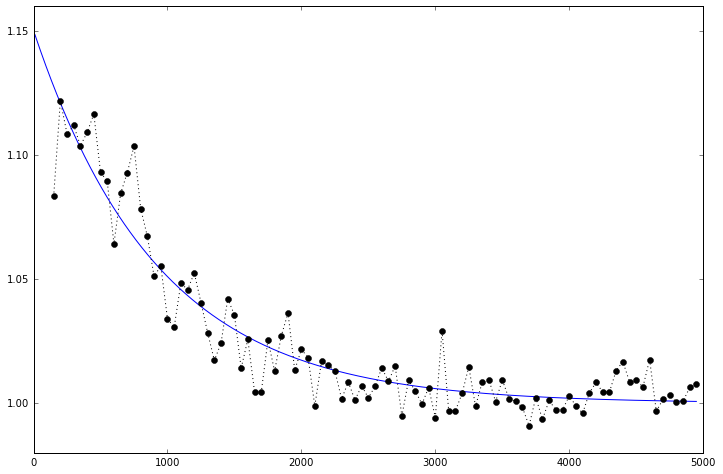

In [7]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B0.3V hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B0.3V hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

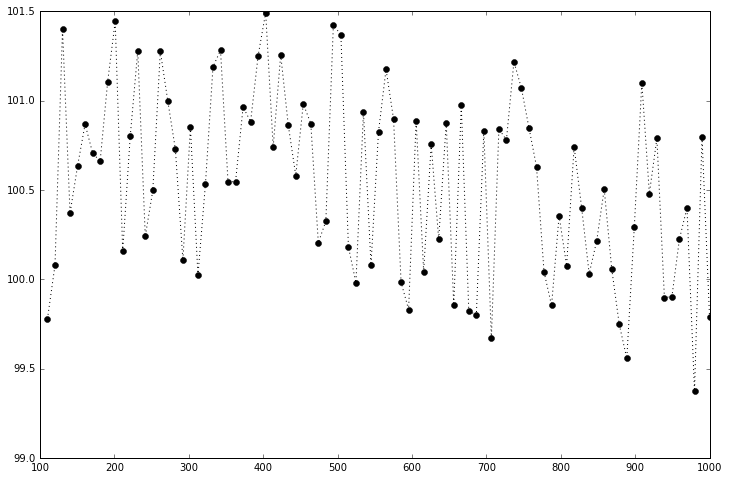

In [9]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B0.3V RF185 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B0.3V RF185 rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
#plt.plot(t,RabiFit(t,*opt0),'b-')
#print opt0
#print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

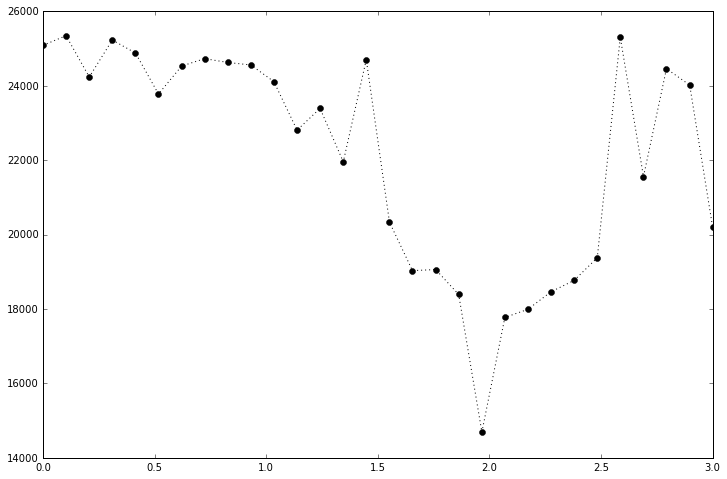

In [10]:
d = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B sweep PL')

plt.plot(d[:,0],d[:,1],'ko:')

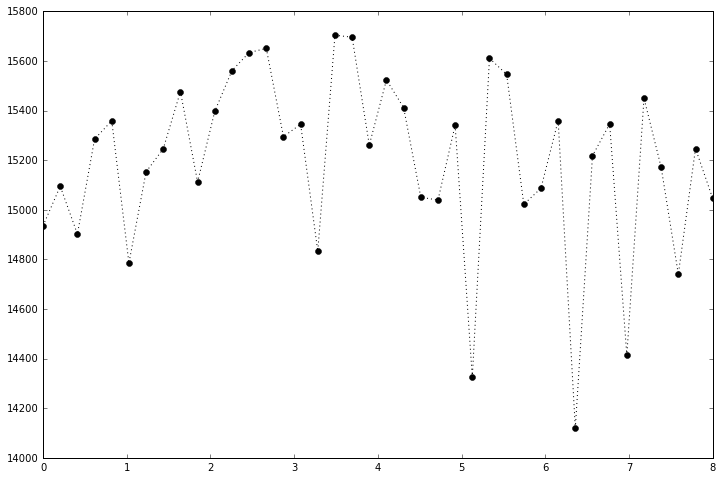

In [11]:
d = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B2V angle sweep PL')
plt.plot(np.linspace(0,8,num=d[:,0].shape[0]),d[:,4],'ko:')

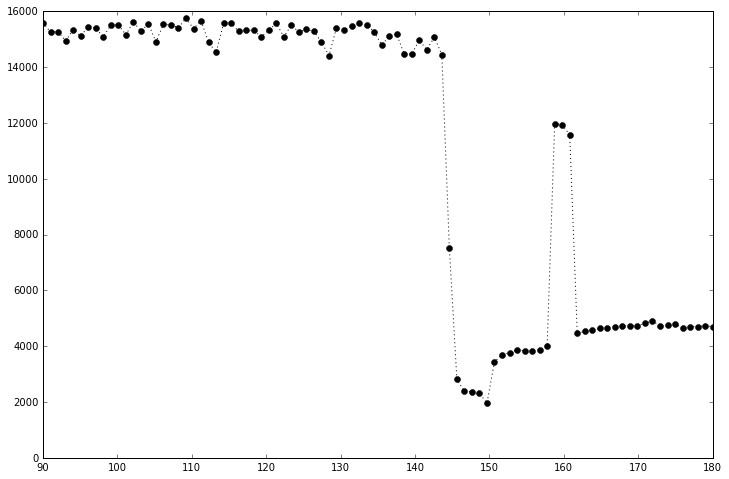

In [12]:
d = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-19-16\MNP 4 on CPW 5mW scan 6 x71 y82 T124 X-3.99 Y5.92 B2V angle sweep PL')
plt.plot(np.linspace(90,180,num=d[:,0].shape[0]),d[:,4],'ko:')

[  8.50523009e+00   1.03459731e-02  -1.15059044e+00   2.37955413e+02
   1.00213035e+02]
(2.4460478425383432, 9.9999999999999982)


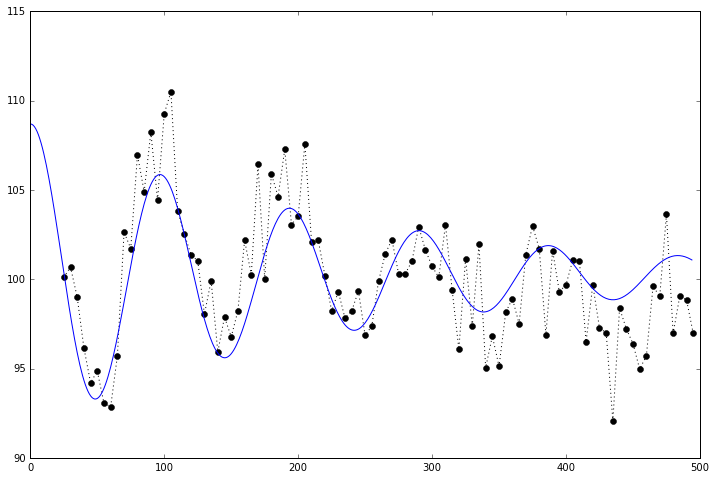

In [28]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-28-16\MNP 5 on CPW 5mW scan 14 x85 y100 T0 X15.4 B0.5V rabi *[2-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-28-16\MNP 5 on CPW 5mW scan 14 x85 y100 T0 X15.4 B0.5V rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

Phi: 256.234413 +/- 14.278808
Theta: 20.290104 or +/- 4.932486
Phi(naive): 189.101000
Theta(naive): 46.833944


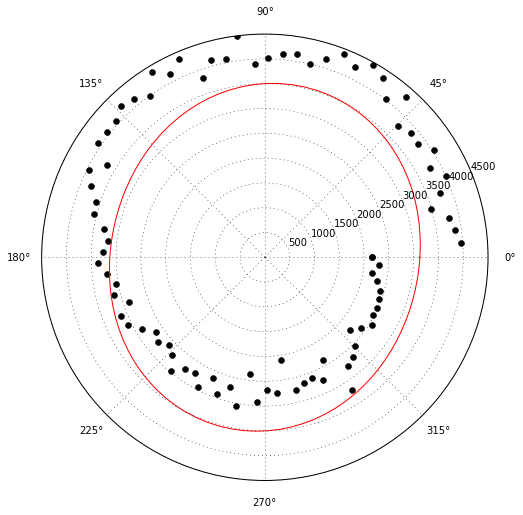

In [25]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-28-16\MNP 5 on CPW 0.5mW scan 14 x85 y100 rotor sweep')
T1[:,1] -= 1459
OrientPol(T1,False)

[  1399.86983871   6236.01332986  19508.65131215]
(20253.510204081631, 0.0070266747017709765, 0.0065113956489662754)


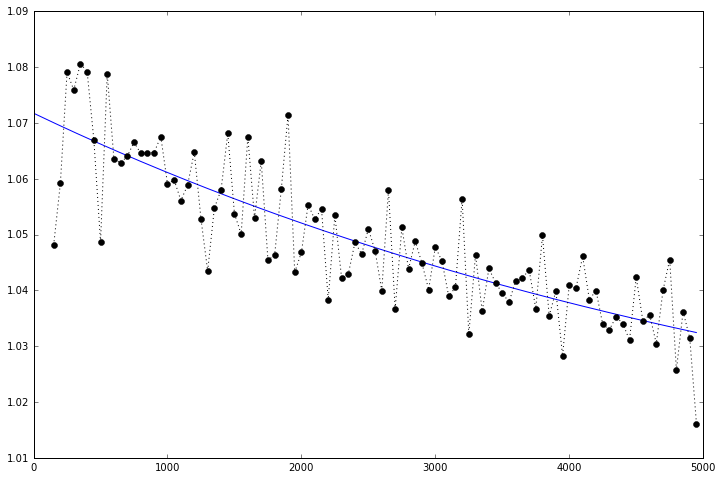

In [44]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-28-16\MNP 5 on CPW 5mW scan 14 x85 y100 T0 X15.4 B0.5V hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-28-16\MNP 5 on CPW 5mW scan 14 x85 y100 T0 X15.4 B0.5V hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[  4.13628112e+00   9.21036042e-03   1.08968376e+01   2.64028297e+02
   1.00502104e+02]
(1.8827934706866003, 10.0)


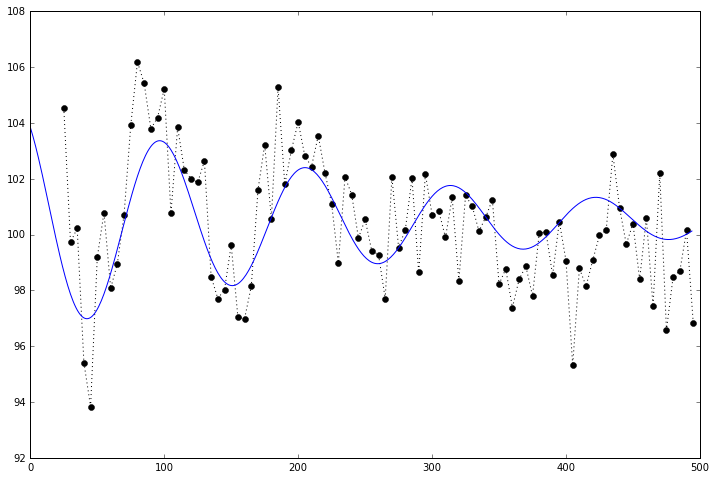

In [50]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-28-16\MNP 5 on CPW 5mW scan 15 x93 y98 T0 X15.4 B0.5V rabi *[2-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-28-16\MNP 5 on CPW 5mW scan 15 x93 y98 T0 X15.4 B0.5V rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

Phi: 160.733712 +/- 0.731733
Theta: 50.660872 or +/- 0.654270
Phi(naive): 156.742000
Theta(naive): 55.895744


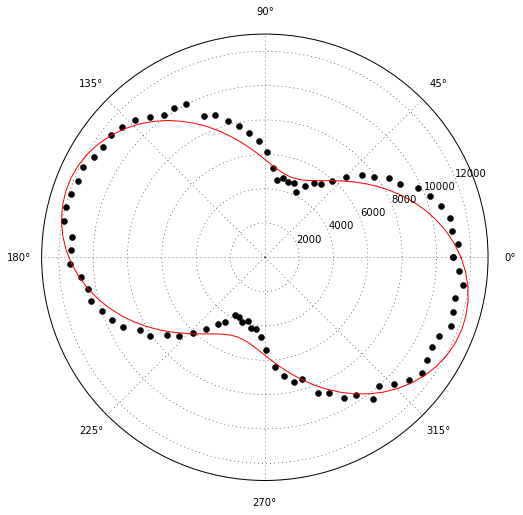

In [2]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-29-16\MNP 5 on CPW scan 4 0.5mW x76 y122 Rotor Sweep 1')
T1[:,1] -= 1459
OrientPol(T1,False)

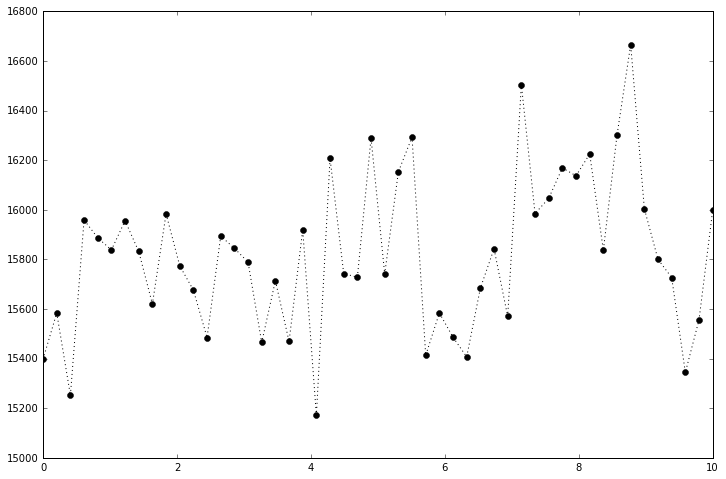

In [3]:
d = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-29-16\MNP 5 on CPW scan 4 0.5mW x76 y122 T-20 d sweep')
plt.plot(np.linspace(0,10,num=d[:,0].shape[0]),d[:,4],'ko:')

[  9.56016062e+00   1.12290950e-02  -3.28293903e+00   3.49288553e+02
   1.00693611e+02]
(1.1761848851017098, 10.0)


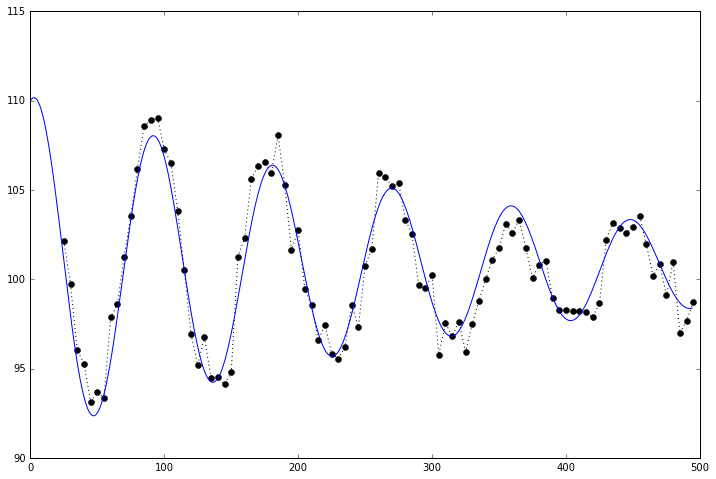

In [5]:

def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-29-16\MNP 5 on CPW scan 4 0.5mW x76 y122 T-20 X5.33 Y-1.9 B 0.5V f3.164 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-29-16\MNP 5 on CPW scan 4 0.5mW x76 y122 T-20 X5.33 Y-1.9 B 0.5V f3.164 Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

[  3387.5088965     124.66751632  17338.01802214]
(17192.510204081631, 0.0076265892089711915, 0.0069437410464820003)


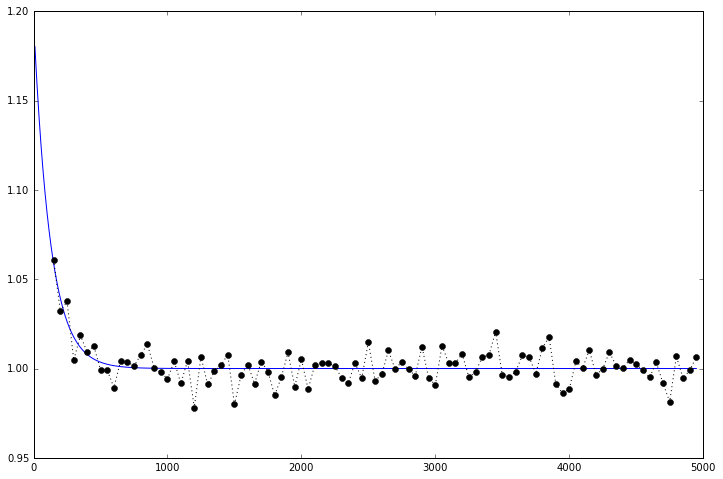

In [7]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D


time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-29-16\MNP 5 on CPW scan 4 0.5mW x76 y122 T-20 X5.33 Y-1.9 B 0.5V f3.164 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-29-16\MNP 5 on CPW scan 4 0.5mW x76 y122 T-20 X5.33 Y-1.9 B 0.5V f3.164 hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

In [1]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 0.5mW scan 5 ODMR x150 y41 rotor sweep')
T1[:,1] -= 1459
OrientPol(T1,False)

NameError: name 'np' is not defined